# ■ LangChain

LLMのラッパー

- [LangChain公式ドキュメント](https://python.langchain.com/docs/get_started/introduction)
- [LangChain | GitHub](https://github.com/langchain-ai/langchain)

## # モジュール

- [Modules | LangChain](https://python.langchain.com/docs/modules/)
  - [Model I/O](https://python.langchain.com/docs/modules/model_io/)
  - [Prompts](https://python.langchain.com/docs/modules/model_io/prompts/)
  - [Chains](https://python.langchain.com/docs/modules/chains)
  - [Indexing](https://python.langchain.com/docs/modules/data_connection/indexing)
  - [Memory](https://python.langchain.com/docs/modules/memory/)
  - [Agents](https://python.langchain.com/docs/modules/agents/)

# ■ Get Started

- [Get started | LangChain](https://python.langchain.com/docs/expression_language/get_started)

prompt, model, output parserを利用した基本的な例

In [1]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

prompt = ChatPromptTemplate([
    ("user", "{topic} についてのジョークをおしえて")
])
model = ChatOpenAI(model="gpt-4")
output_parser = StrOutputParser()

chain = prompt | model | output_parser

chain.invoke({"topic": "ふとん"})

'なぜ布団が10を数えるのが得意なのですか？\n\nだって、布団（ふとん）ですから！'

# ■ Models モジュール

LangChainで使用する機械学習のモデルのこと。以下の3種類がある。

- LLMs  
OpenAIのCompletions API(gpt-3.5-turbo-instructなど)の大規模言語モデル
- Chat Models  
OpenAIのChat API(gpt-4, gpt-3.5-turboなど)の大規模言語モデル
- Text Embedding Models
テキストをベクトル化するモデル。

## LLMs

- [OpenAI](https://python.langchain.com/docs/integrations/llms/openai/)

内部的にはCompletionsAPIが利用される


※ 現在はほぼほぼ使われない。ChatModelsの方を使う

In [5]:
from langchain_openai import OpenAI
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)
result = llm.predict("自己紹介してください")
print(result)



私は、山田太郎と申します。東京都出身で、現在は大学生として都内の大学に通っています。趣味はスポーツ観戦や音楽鑑賞で、特にサッカーやロックバンドが好きです。将来の夢は、国際的な企業で働くことで、留学経験も積んで自分を磨きたいと思っています。また、人とのコミュニケーションを大切にし、常に新しいことに挑戦することで成長していきたいと考えています。よろしくお願いします。


## Chat Models

- [ChatOpenAI](https://python.langchain.com/docs/integrations/chat/openai/)

内部的には ChatAPIが利用される

In [3]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o", temperature=0)
result = llm.predict("自己紹介してください")
print(result)

/tmp/ipykernel_179390/1915069723.py:3: LangChainDeprecationWarning: The method `BaseChatModel.predict` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = llm.predict("自己紹介してください")


こんにちは！私はOpenAIが開発したAIアシスタントです。さまざまな質問に答えたり、情報を提供したり、アイデアを整理するお手伝いをしたりすることができます。趣味や興味、特定のトピックについてお話しすることもできますので、何か知りたいことや話したいことがあればお気軽にどうぞ！


# プロンプトテンプレートとChainを利用する

- [How to invoke runnables in parallel](https://python.langchain.com/docs/how_to/parallel/)

## Prompt Templates
プロンプトをテンプレート化することができる。  
あくまで文字列を編集するだけでAPIをコールするわけではない。


## Chain
chainsは、モジュール(Models, Templates, Chainsなど)を連結する。


In [15]:
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

model = ChatOpenAI(model="gpt-4o-mini")

parser = StrOutputParser()

template = """
次のコマンドの概要を説明してください。

コマンド: {command}
"""

prompt = ChatPromptTemplate([
  HumanMessagePromptTemplate.from_template(template)
])

chain = prompt | model | parser

# How to Streaming: https://python.langchain.com/docs/how_to/streaming/ 
stream = chain.stream({"command": "ls"})
for message in stream:
  print(message, end="")


`ls` コマンドは、Unix系オペレーティングシステム（LinuxやmacOSなど）で使用されるコマンドで、指定したディレクトリ内のファイルやサブディレクトリの一覧を表示するために使われます。デフォルトでは、現在の作業ディレクトリの内容を表示します。

主なオプションには以下のようなものがあります：

- `-l`: 詳細情報を表示します（ファイルの権限、所有者、サイズ、最終更新日時など）。
- `-a`: 隠しファイル（ドットで始まるファイル）も表示します。
- `-h`: サイズを人間に読みやすい形式（KB、MBなど）で表示します（`-l`オプションと併用することが多い）。
- `-R`: サブディレクトリも再帰的に表示します。

このように、`ls` コマンドはファイルシステムの内容を把握するための基本的かつ重要なツールです。

## LangGraph

llmの出力を次のllmの入力に渡したい場合はLangGraphを使うと便利

- [LangGraph | 公式](https://langchain-ai.github.io/langgraph/)
  - [Tutorials](https://langchain-ai.github.io/langgraph/tutorials/)
- [LangGraphの基本的な使い方 | Zenn](https://zenn.dev/pharmax/articles/8796b892eed183)


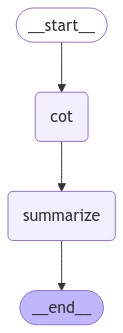

In [1]:
from pydantic import BaseModel
#from typing_extensions import TypedDict
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain_openai import ChatOpenAI
#from langchain_core.output_parsers import StrOutputParser
from langgraph.graph import START, StateGraph, END
from IPython.display import Image, display

model = ChatOpenAI(model="gpt-4o-mini")

cot_template = """
以下の質問に回答してください。

### 質問 ###
{question}
### 質問終了 ###

ステップバイステップで考えましょう。
"""

cot_prompt = ChatPromptTemplate([
  HumanMessagePromptTemplate.from_template(cot_template)
])



summarize_template = """
入力を結論だけ一言に要約してください。

### 入力 ###
{answer}
### 入力終了 ###
"""

summarize_prompt = ChatPromptTemplate([
  HumanMessagePromptTemplate.from_template(summarize_template)
])


### Graph ###

class MyState(BaseModel):
  question: str
  answer: str = ""
  summary: str = ""

workflow = StateGraph(state_schema=MyState)

def call_cot_chain(state: MyState):
  chain = cot_prompt | model
  response = chain.invoke({"question": state.question})
  return {"answer": response.content}

def call_summarize_chain(state: MyState):
  chain = summarize_prompt | model
  response = chain.invoke({"answer": state.answer})
  return {"summary": response.content}


workflow.add_node("cot", call_cot_chain)
workflow.add_node("summarize", call_summarize_chain)

workflow.add_edge(START, "cot")
workflow.add_edge("cot", "summarize")
workflow.add_edge("summarize", END)

app = workflow.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [2]:
output = app.invoke({
    "question": "私は市場に行って10個のリンゴを買いました。隣人に2つ、修理工に2つ渡しました。それから5つのリンゴを買って1つ食べました。残りは何個ですか？"
})
print(output["summary"])

リンゴは10個残っています。


# ■ Output Parsers

- [Modules - Model I/O - Output Parsers | LangChain](https://python.langchain.com/docs/modules/model_io/output_parsers/)

LLMの応答を抽出して、Pythonオブジェクトにマッピングするといった機能を提供する。  
他にもOutput Parserには、不正な形式でうまく解析できなかった場合に LLM に形式を整えてもらうような機能がある。  

Promptsには他にも、Few-shotプロンプティングの例を埋め込むための「ExampleSelectors」という機能もある

In [4]:
from typing import List
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import PydanticOutputParser

# モデル
model = ChatOpenAI(model="gpt-4o-mini")

# プロンプトテンプレート
template = """料理のレシピを教えてください。

{format_instructions}

料理名: {dish}
"""

prompt = ChatPromptTemplate([
  HumanMessagePromptTemplate.from_template(template)
])

# アウトプットパーサー
class Recipe(BaseModel):
  ingredients: List[str] = Field(description="ingredients of the dish")
  step: List[str] = Field(description="steps to cook the dish")

parser = PydanticOutputParser(pydantic_object=Recipe)


# chain
chain = prompt | model | parser


chain.invoke({
  "format_instructions": parser.get_format_instructions(),
  "dish": "カレー"
})


Recipe(ingredients=['鶏肉 300g', '玉ねぎ 1個', 'にんじん 1本', 'じゃがいも 2個', 'カレールー 100g', '水 500ml', 'サラダ油 大さじ2', '塩 適量', 'こしょう 適量'], step=['鶏肉を一口大に切り、塩とこしょうで下味をつける。', '玉ねぎを薄切り、にんじんとじゃがいもを一口大に切る。', '鍋にサラダ油を熱し、玉ねぎを炒める。', '玉ねぎが透明になったら、鶏肉を加え、表面が白くなるまで炒める。', 'にんじんとじゃがいもを加え、さらに炒める。', '水を加え、中火で煮立たせる。', '煮立ったらアクを取り、弱火にして15分煮る。', 'カレールーを加え、溶かしながら10分煮る。', '全体がなじんだら、器に盛り付けて完成。'])

# [Embeddingモデルの使い方](https://python.langchain.com/docs/how_to/embed_text/)

In [8]:
from typing import List
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()


`embed_documents` で文字列のリストをベクトル化する

In [9]:
documents = [
    "Hi there!",
    "Oh, hello!",
    "What's your name?",
    "My friends call me World",
    "Hello World!",
]

# 文字列のリストを入力として、それぞれの文書をベクトル化
embeddings: List[List[float]] = embeddings_model.embed_documents(documents)

print(len(embeddings), len(embeddings[0]))
print(embeddings[0])


5 1536
[-0.020350975915789604, -0.007109511643648148, -0.022864697501063347, -0.026229018345475197, -0.0374772809445858, 0.021671313792467117, -0.006227170117199421, -0.009007496759295464, 0.008455240167677402, -0.01656770147383213, 0.026838405057787895, -0.007433248218148947, -0.013609636574983597, -0.024172339588403702, 0.006442994810640812, -0.020249411463737488, 0.02426120825111866, -0.01470145396888256, 0.01641535386443138, -0.016555005684494972, -0.007230119314044714, -0.008112460374832153, 0.004665616899728775, -0.0020773103460669518, -0.014790322631597519, -0.006055780220776796, -0.0021042884327471256, -0.022978955879807472, 0.01986854523420334, -0.03158654272556305, 0.012924076057970524, 0.011692606844007969, -0.008563152514398098, -0.009515319019556046, -0.001802769023925066, -0.02739701047539711, -0.008258459158241749, 0.0021042884327471256, 0.024007296189665794, -0.00873454287648201, 0.02352486550807953, 0.000928362540435046, 0.009800969623029232, -0.013977807015180588, -0.

`embed_query` で一つのテキストをベクトル化するされた文章との類似度を産出する

In [10]:
embedded_query = embeddings_model.embed_query("Hello World!")
embedded_query

[0.002366728847846389,
 0.00027399256941862404,
 -0.002253352664411068,
 -0.025635626167058945,
 -0.011419505812227726,
 0.001054241438396275,
 -0.014890078455209732,
 0.003577649826183915,
 6.24947133474052e-05,
 -0.027613410726189613,
 0.023771217092871666,
 0.005060988944023848,
 -0.027789773419499397,
 -0.010071588680148125,
 0.007879648357629776,
 0.011564375832676888,
 0.02482939511537552,
 -0.014285405166447163,
 0.007470233831554651,
 0.009737757965922356,
 -0.007111208979040384,
 0.008673281408846378,
 0.010159770026803017,
 0.0055081951431930065,
 -0.006103420164436102,
 0.001751032890751958,
 0.005060988944023848,
 -0.01871967501938343,
 0.037716493010520935,
 -0.024350695312023163,
 0.016250593587756157,
 -0.012106061913073063,
 -0.003204453270882368,
 -0.024640433490276337,
 0.010090484283864498,
 -0.011942296288907528,
 0.002725753467530012,
 -0.012679241597652435,
 0.01567111536860466,
 -0.01863149367272854,
 0.008641787804663181,
 0.0097881481051445,
 0.0048657297156751